<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/NB02__Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas & observações
* Foco do numPy para Data Analysis. Portanto, utilizar o livro "Mastering Pandas", capítulo que fala de numPy e pegar o conteúdo que importa para Data Analysis.
* Usar os livros (estão no meu Dropbox): Python Data Analysis & Python Data Analysis Cookbook para conteúdos de Pandas.
* Qual a interpretação para os v_Autovalores e autovetores?
* Explorar: https://www.w3resource.com/python-exercises/numpy/index-array.php - Lá há exercícios de estatísti

* Explorar em busca de exercícios de estatística: https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.ipynb

* Ler: https://medium.com/intellipaat/python-numpy-tutorial-b0118b79cf3c

___
# **Agenda**:
> Nesta capítulo, vamos falar sobre:

* NumPy
* Criar arrays
* Criar ndarrays - Arrays Multidimensionais
* Selecionar itens
* Aplicar funções como max(), min() e etc
* Calcular Estatísticas Descritivas: média e variância
* Reshaping
* Tansposta de um ndarray
* Autovalores e Autovetores
* Wrap Up
* Exercícios

___
# **NumPy**
* O NumPy é um pacote para computação científica e álgebra linear para Python.

![Numpy](https://github.com/MathMachado/Python_RFB/blob/master/Material/numpy_basics-1.png?raw=true)

## Import Statement - Primeiros exemplos
> Como exemplo, considere gerar uma amostra aleatória de tamanho 10 da Distribuiçao Normal(0, 1):

## Importar a library NumPy

### **Opção 1**: Importar a biblioteca NumPy COM alias

In [0]:
import numpy as np

In [0]:
# Set up o número de casas decimais para o NumPy:
np.set_printoptions(precision= 2, suppress= True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
np.random.seed(seed= 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, sigma)
mu= 0
sigma= 1
v_Array= np.random.normal(mu, sigma, size= 10) # Array 1D de size= 10
v_Array

NameError: ignored

**Observação**: Altere o valor de [precision] para 4, 2 e 0 e observe o que acontece.

### **Opção 2**: Importar a biblioteca NumPy SEM alias

In [0]:
import numpy

In [0]:
# Set up o número de casas decimais para o NumPy:
numpy.set_printoptions(precision= 2, suppress=True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
numpy.random.seed(seed= 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, sigma)
mu= 0
sigma= 1
numpy.random.normal(size= 10)

array([ 2.51,  1.11,  2.06,  0.56,  0.3 ,  1.05, -0.13,  1.06,  1.14,
        1.38])

### **Opção 3**: Importar funções específicas da biblioteca NumPy

In [0]:
from numpy import set_printoptions
from numpy.random import seed, normal

In [0]:
# Set up o número de casas decimais para o NumPy:
set_printoptions(precision= 2, suppress=True)

'''
Define seed por questões de reproducibilidade, ou seja, 
garante que todos vamos gerar os mesmos números aleatórios
'''
seed(seed= 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, sigma)
mu= 0
sigma= 1
normal(size= 10)

array([ 2.51,  1.11,  2.06,  0.56,  0.3 ,  1.05, -0.13,  1.06,  1.14,
        1.38])

### Comentários sobre o import
> Eu, particularmente, prefiro as opções 1 ou 2 e é a que uso nesse treinamento.

___
# **Estatísticas Descriticas com NumPy**

## Exemplo 1
> Vamos voltar ao mesmo exemplo anterior, mas desta vez, usando a opção 1 (com alias):

* Gerar uma amostra aleatória de tamanho 10 da Distribuiçao Normal(0, 1).

In [0]:
# Set up o número de casas decimais para o NumPy:
np.set_printoptions(precision= 2, suppress=True)

# Define seed
np.random.seed(seed= 20111974)

# Gera 10 números aleatórios a partir da Distribuição Normal(mu, sigma)
mu= 0
sigma= 1
v_Array= np.random.normal(mu, sigma, size= 10) # Array 1D de size= 10
v_Array

array([ 2.51,  1.11,  2.06,  0.56,  0.3 ,  1.05, -0.13,  1.06,  1.14,
        1.38])

Conferindo a média e desvio-padrão do array gerado:

In [0]:
f'Distribuição N({np.mean(v_Array)}, {np.std(v_Array)})'

'Distribuição N(0.3627922019756259, 0.9199426427990713)'

Estávamos à espera de mu= 0 e std= 1. Certo?

Porque isso não aconteceu?

## **Laboratório 1**
> Altere os valores de [size] para 100, 1.000, 10.000, 100.000 e 1.000.000 e relate o que acontece com a média e desvio padrão.

## **Minha solução**

In [0]:
# Define a média e o desvio-padrão
mu= 0
sigma= 1

# Define seed
np.random.seed(seed= 20111974)

for i_Size in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    v_Array= np.random.normal(mu, sigma, size= i_Size)
    print(f'Size: {i_Size}--> Distribuição: N({np.mean(v_Array)}, {np.std(v_Array)})')

Size: 10--> nDistribuição: N(1.1043374540652753, 0.735246705657231)
Size: 100--> nDistribuição: N(-0.14020525697186714, 0.9254100654233511)
Size: 1000--> nDistribuição: N(0.021644923462910873, 1.0054417533501039)
Size: 10000--> nDistribuição: N(0.015499353804764507, 0.9970905566844254)
Size: 100000--> nDistribuição: N(0.002039323041103302, 0.9960906293570095)
Size: 1000000--> nDistribuição: N(-1.1062145143945444e-06, 0.999473966169304)
Size: 10000000--> nDistribuição: N(0.0002892972723094128, 1.0001202837422036)


Com relação à Distribuição Normal($\mu, \sigma$), temos que:

![NormalDistribution](https://github.com/MathMachado/Python4DS/blob/DS_Python/Material/NormalDistribution.PNG?raw=true)

Fonte: [Normal Distribution](https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2)

## Lei Forte dos Grandes Números - LFGN
> Por favor, leia o que diz a [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).

* O que você aprendeu com isso?

## Exemplo 2
> Vamos nos aprofundar um pouco mais no que diz a LFGN. Para isso, vamos simular o lançamento de dados. Como sabemos, os dados possuem 6 lados numerados de 1 a 6, com igual probabilidade. Certo?

A LFGN nos diz que à medida que N (o tamanho da amostra ou número de dados) cresce, então a média dos dados converge para o valor esperado. Isso quer dizer que:

$$\frac{1+2+3+4+5+6}{6}= \frac{21}{6}= 3,5$$

Ou seja, à medida que N cresce, espera-se que a média dos dados se aproxime de 3,5. Ok?

Vamos ver se isso é verdade...

Primeiramente, vamos demonstrar o uso da função np.random.randint, a seguir:

In [0]:
# Define seed
np.random.seed(seed= 20111974)

O que significa ou qual é a interpretação do resultado abaixo?

In [0]:
# Simular 100 lançamentos de um dado:
v_Dados= np.random.randint(1, 7, size= 100)
v_Dados

array([6, 5, 6, 3, 3, 1, 6, 6, 3, 2, 2, 5, 4, 6, 5, 2, 2, 4, 4, 1, 3, 1,
       4, 5, 6, 6, 5, 5, 2, 5, 3, 4, 6, 2, 3, 4, 1, 4, 2, 6, 3, 2, 6, 6,
       5, 4, 4, 4, 4, 1, 1, 5, 3, 5, 6, 3, 1, 2, 4, 1, 5, 3, 2, 3, 5, 2,
       4, 6, 4, 1, 6, 2, 2, 2, 6, 1, 5, 3, 5, 6, 3, 6, 1, 5, 4, 1, 6, 6,
       2, 1, 6, 4, 2, 3, 2, 5, 2, 4, 5, 6])

In [0]:
import pandas as pd
pd.value_counts(v_Dados)

6    21
2    18
5    17
4    17
3    14
1    13
dtype: int64

**Interpretação**: Isso quer dizer que fizemos a simulação de lançamento de um dado 100 vezes. Acima, a frequência com que cada lado do dado aparece.

Eu estava à espera de frequência igual para cada um dos lados, isto é, por volta dos 16 ou 17. Ou seja:

$$\frac{100}{6}= 16,66$$

Mas ok, vamos continuar com nosso experimento...

In [0]:
# Definir a semente
for i_Size in [10, 30, 50, 75, 100, 1000, 10000, 100000, 1000000]:
    np.random.seed(20111974) # Porque a seed tem que ser definido dentro do loop?
    v_Dados= np.random.randint(1, 7, size= i_Size)
    print(f'Size= {i_Size} --> Média: {np.mean(v_Dados)}')

Size= 10 --> Média: 2.6
Size= 30 --> Média: 3.2
Size= 50 --> Média: 3.24
Size= 75 --> Média: 3.44
Size= 100 --> Média: 3.51
Size= 1000 --> Média: 3.466
Size= 10000 --> Média: 3.5164
Size= 100000 --> Média: 3.50967
Size= 1000000 --> Média: 3.502262


E agora, como você interpreta esses resultados?

## Calculando percentis
> Considere o array de retornos (simulados) a seguir:

In [0]:
np.random.seed(20111974)

# Simulando Retornos de ativos financeiros com a distribuição Normal(0,1):
v_Retornos= np.random.normal(0, 1, 100)
print(f'Média: {np.mean(v_Retornos)}')

Média: -0.016996335492713833


In [0]:
v_Retornos

array([ 2.51,  1.11,  2.06,  0.56,  0.3 ,  1.05, -0.13,  1.06,  1.14,
        1.38, -2.06,  0.67,  0.73, -0.34,  0.44,  0.59, -1.29,  1.18,
       -0.99, -1.79, -1.09, -0.91, -1.02, -1.36, -0.29,  0.06, -1.14,
       -0.51, -0.84, -1.41, -0.22, -1.17, -0.61, -0.62,  1.08,  0.5 ,
        0.03,  1.83,  0.35, -1.15, -0.6 , -0.43,  0.11, -0.75,  0.72,
       -0.51,  0.48, -0.38, -1.37,  1.54, -0.27,  0.68, -1.8 ,  1.17,
       -0.38,  0.19,  1.54, -0.12, -0.98, -1.23,  1.05,  1.91,  0.8 ,
        0.36,  1.03, -0.37,  0.33,  0.7 , -0.98, -1.21,  0.74,  0.18,
        0.1 , -0.78, -0.04,  1.67, -1.07, -0.55, -1.83,  0.12,  1.39,
       -0.29,  0.32, -0.7 , -0.44, -2.03, -0.14,  1.66, -0.58, -0.79,
       -0.81,  0.06,  0.87, -0.35,  1.37,  0.88, -1.48, -0.41, -0.19,
        0.47, -0.2 , -1.27,  0.16, -1.12,  0.15,  0.36,  0.53,  0.19,
       -0.61,  0.53, -0.5 , -0.15, -0.81,  0.87,  1.13,  0.88, -0.91,
        1.37,  0.13, -0.52,  0.24,  1.39, -0.03, -0.77,  1.51, -1.04,
        0.49,  0.32,

A seguir, o boxplot do array v_Retornos:

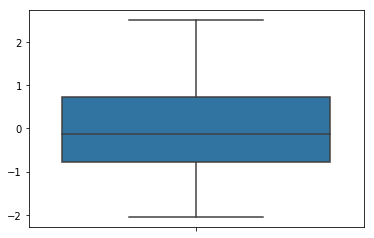

In [0]:
# Import a biblioteca seaborn:
import seaborn as sns
sns.boxplot(y= v_Retornos)

In [0]:
np.percentile(v_Retornos, q=[1, 5, 25, 50, 55, 75, 99])

array([-2.03, -1.49, -0.78, -0.12,  0.08,  0.72,  2.06])

___
# **Ordenar itens de um array**
> Considere o array a seguir:

In [0]:
np.random.seed(20111974)
v_X= np.random.random(10)
v_X

array([0.53, 0.57, 0.54, 0.65, 0.86, 0.6 , 0.87, 0.46, 0.67, 0.64])

Ordenando os itens de v_X...

In [0]:
np.sort(v_X)

array([0.46, 0.53, 0.54, 0.57, 0.6 , 0.64, 0.65, 0.67, 0.86, 0.87])

___
# **Obtendo ajuda**

In [0]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

___
# **Criar arrays 1D**

In [0]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)
np.random.seed(seed= 20111974)

Criar o ndarray 1D v_Array, com os seguintes números:

In [0]:
v_Array= np.array([0,1,2,3,4,5,6,7,8,9])
v_Array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Qual a dimensão de v_Array?

In [0]:
# Dimensão do array
v_Array.ndim

1

Qual o shape de v_Array?

In [0]:
# Números de itens no array
v_Array.shape

(10,)

O array v_Array poderia ter sido criado usando a função np.arange(inicio, fim, step):

In [0]:
v_Array2= np.arange(start=0, stop=10, step=1)

Ou seja, v_Array é igual a v_Array2. Ok?

Soma 2 à cada item de v_Array:

In [0]:
v_Array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
v_Array2= v_Array + 2
v_Array2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Multiplicar por 10 cada item de v_Array:

In [0]:
v_Array3= v_Array*10
v_Array3

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

___
# **Criar ndarrays - Arrays Multidimensionais**
> Ao criarmos, por exemplo, um array 2D, então a chamamos de matriz.

Criar o ndarray com 2 linhas e 3 colunas usando números aleatórios:

In [0]:
np.random.seed(20111974)
m_Array_2_X_3= np.random.randn(2, 3)
m_Array_2_X_3

array([[2.51, 1.11, 2.06],
       [0.56, 0.3 , 1.05]])

## Dimensão de um array
> Dimensão é o número de linhas e colunas da matriz.

In [0]:
m_Array_2_X_3.shape

(2, 3)

m_Array_2_X_3 é um array 2D (ou matriz), ou seja, 2 linhas, onde cada linha tem 3 elementos.

Criar um ndarray com 3 linhas e 3 colunas:

In [0]:
m_Array_3_X_3 = np.array([[1,2,3],[4,5,6],[7,8,9]])
m_Array_3_X_3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
# Número de linhas e colunas de m_Array_2_X_3:
m_Array_2_X_3.shape

(2, 3)

In [0]:
# Número de linhas e colunas de m_Array_3_X_3
m_Array_3_X_3.shape

(3, 3)

In [0]:
# Somar 2 à cada elemento de m_Array_3_X_3
m_Array_3_X_3= m_Array_3_X_3+2
m_Array_3_X_3

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [0]:
# Multiplicar por 10 cada elemento de m_Array_3_X_3
m_Array_3_X_3= m_Array_3_X_3*10
m_Array_3_X_3

array([[ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

___
# **Cópia de arrays**
> Considere o ndarray abaixo:

In [0]:
np.random.seed(20111974)
X= np.random.randn(2, 3)
X

array([[2.51, 1.11, 2.06],
       [0.56, 0.3 , 1.05]])

Fazendo a cópia de X...

In [0]:
Y= X.copy()
Y

array([[2.51, 1.11, 2.06],
       [0.56, 0.3 , 1.05]])

___
# **Operações com arrays**
> Considere um array com temperaturas em Farenheit dado por:

In [0]:
# Define a seed
np.random.seed(20111974)

v_Farenheit= np.array(np.random.randint(0, 100, 10))
v_Farenheit                                        

array([60, 42, 40,  8, 27,  2, 46, 88, 81, 88])

In [0]:
type(v_Farenheit)

numpy.ndarray

Calculando para graus centígrados...

In [0]:
5*v_Farenheit/9 - 5*32/9

array([ 15.56,   5.56,   4.44, -13.33,  -2.78, -16.67,   7.78,  31.11,
        27.22,  31.11])

___
# **Selecionar itens**

In [0]:
# Selecionar o segundo item de v_Array (lembre-se que no Python arrays começam com indice= 0)
v_Array[1]

NameError: ignored

Dado m_Array_3_X_3 abaixo:

In [0]:
m_Array_3_X_3

array([[ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

... selecionar o item da linha 2, coluna 3 do ndarray m_Array_3_X_3:

In [0]:
m_Array_3_X_3[1,2]

80

In [0]:
# Selecionar o último elemento de v_Array
v_Array[-1]

9

___
# **Aplicar funções como max(), min() e etc**

In [0]:
f'O máximo de v_Array é: {np.max(v_Array)}'

'O máximo de v_Vetor é: 9'

In [0]:
f'O mínimo de v_Array é: {np.min(v_Array)}'

'O mínimo de v_Vetor é: 0'

In [0]:
f'O máximo de m_Array_3_X_3 é: {np.max(m_Array_3_X_3)}'

'O máximo de m_Array_3_X_3 é: 110'

In [0]:
f'O máximo de cada LINHA de m_Array_3_X_3 é: {np.max(m_Array_3_X_3, axis= 1)}' # Aqui, axis= 1 é que diz ao numpy que estamos interessados nas linhas

'O máximo de cada LINHA de m_Array_3_X_3 é: [ 50  80 110]'

In [0]:
f'O máximo de cada COLUNA de m_Array_3_X_3 é: {np.max(m_Array_3_X_3, axis= 0)}' # axis= 0, diz ao numpy que estamos interessados nas colunas.

'O máximo de cada COLUNA de m_Array_3_X_3 é: [ 90 100 110]'

___
# **Calcular Estatísticas Descritivas: média e variância**

In [0]:
f'A média de v_Array é: {np.mean(v_Array)}'

'A média de v_Vetor é: 4.5'

In [0]:
f'A média de m_Array_3_X_3 é: {np.mean(m_Array_3_X_3)}'

'A média de m_Array_3_X_3 é: 70.0'

In [0]:
f'O Desvio Padrão de m_Array_3_X_3 é: {np.std(m_Array_3_X_3)}'

'O Desvio Padrão de m_Array_3_X_3 é: 25.81988897471611'

___
# **Reshaping**
> Muito útil em Machine Learning.

## Exemplo 1
* O ndarray m_Array_3_X_3 tem a seguinte forma:

In [0]:
m_Array_3_X_3

array([[ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

In [0]:
# reshaping para 9 linhas e 1 coluna:
m_Array_3_X_3.reshape(9,1)

array([[ 30],
       [ 40],
       [ 50],
       [ 60],
       [ 70],
       [ 80],
       [ 90],
       [100],
       [110]])

## Mais um exemplo de Reshape
> Dado o array 1D abaixo, reshape para um array 3D com 2 colunas.

In [0]:
# Define seed
np.random.seed(20111974)
v_Array= np.array(np.random.randint(1, 10, size= 15))
v_Array

array([9, 9, 3, 9, 2, 9, 1, 5, 3, 1, 9, 4, 8, 2, 4])

### Solução
> Temos 15 elementos em v_Arraypara construir ("reshape") um array 3D com 2 colunas.

A princípio, a solução seria...

In [0]:
v_Array.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.

ValueError: ignored

Porque temos esse erro?

E se fizermos...

In [0]:
# Define seed
np.random.seed(20111974)
v_Array= np.array(np.random.randint(1, 10, size= 16)) # Observe que agora temos 16 elementos
v_Array

Reshapping...

In [0]:
v_Array.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.

Porque agora deu certo?

## Último exemplo com reshape
> Considere o ndarray a seguir:

In [0]:
np.random.seed(20111974)
m_Array_2_X_3= np.random.randn(2, 3)
m_Array_2_X_3

Queremos agora transformá-la num ndarray de 3 linhas e 2 colunas.

In [0]:
m_Array_2_X_3.reshape(-1, 2)

Poderia ser...

In [0]:
m_Array_2_X_3.reshape(3, -1)

E por fim, também poderia ser...

In [0]:
m_Array_2_X_3.reshape(3, 2)

___
# **Transposta**
* O ndarray m_Array_3_X_3 tem a seguinte forma:

In [0]:
m_Array_3_X_3

In [0]:
# Transposta do ndarray m_Array_3_X_3 é dado por:
m_Array_3_X_3.T

Ou seja, linha virou coluna. Ok?

# **Inversa da matriz quadrada**
> Se uma matriz, é não-singular, então sua inversa existe.

* Se o determinante de uma matriz  is not equal to zero, then the matrix isé diferente de 0, então a matriz é não-singular.

In [0]:
import numpy as np

m_X = np.array([[1,2,3],[4,5,6],[7,8,9]])
m_Y = np.array([[6, 2], [5, 3]])
m_W = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [0]:
m_X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
m_Y

array([[6, 2],
       [5, 3]])

In [0]:
m_W

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

## Determinantes da matriz quadrada

In [0]:
np.linalg.det(m_X)

0.0

In [0]:
np.linalg.det(m_Y)

8.000000000000002

In [0]:
np.linalg.det(m_W)

-25.000000000000007

A seguir, calculamos as inversas das matrizes acima definidas...

In [0]:
np.linalg.inv(m_Y)

array([[ 0.375, -0.25 ],
       [-0.625,  0.75 ]])

In [0]:
np.linalg.inv(m_X)

LinAlgError: ignored

In [0]:
np.linalg.inv(m_W)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

# **Resolver sistemas de equações lineares**
> Considere o sistema de euqações lineares abaixo:

\begin{equation}
x + 3y + 5z = 10\\
2x+ 5y + z = 8 \\
2x + 3y + 8z= 3
\end{equation}

Ou $Ax = b$. A solução deste sistema de equações é dada por $A^{-1}b$.

Ou seja, basta encontrarmos a inversa de A e multiplicarmos por b.

In [0]:
A= np.array([[1, 3, 5], [2,5,1], [2,3,8]])
np.linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

Agora basta multiplicar a matriz inversa $A^{-1}$ acima por b. 

In [0]:
A_Inv = np.linalg.inv(A)

In [0]:
A_Inv.dot(b)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

Uma forma fácil de se fazer isso é utilizar a expressão abaixo:

In [0]:
b= np.array([[10],[8],[3]])
b

array([[10],
       [ 8],
       [ 3]])

In [0]:
np.linalg.solve(A, b)

array([[-9.28],
       [ 5.16],
       [ 0.76]])

# **Empilhar ndarray**

In [0]:
# Preparando o exemplo:
np.random.seed(20111974)
m_Array1_2_X_3= np.random.randn(2, 3)
m_Array1_2_X_3

In [0]:
np.random.seed(19741120)
m_Array2_2_X_3= np.random.randn(2, 3)
m_Array2_2_X_3

## Método 1 - Concatenate()

In [0]:
np.concatenate([m_Array1_2_X_3, m_Array2_2_X_3], axis=0) # axis= 0 diz ao NumPy para empilhar as colunas

## Método 2 - np.r_[a, b]

In [0]:
np.r_[m_Array1_2_X_3, m_Array2_2_X_3]

**Obs**.: Eu, particularmente, prefiro este método!

## Método 3 - np.vstack()

In [0]:
np.vstack([m_Array1_2_X_3, m_Array2_2_X_3])

# Empilhar arrays
> Dados os arrays abaixo:

In [0]:
v_Array1= np.arange(10).reshape(1,-1)
v_Array1

In [0]:
np.random.seed(20111974)
v_Array1_1= np.random.randn(1, 10)
v_Array

In [0]:
v_Array2= np.arange(10).reshape(1,-1)
v_Array2

In [0]:
np.random.seed(19741120)
v_Array2_1= np.random.randn(1, 10)
v_Array2_1

**Curiosidade**
* Qual a diferença entre gerar os arrays v_Array1 e v_Array1_1?
* Porque para gerar v_Array1 eu uso reshape(1,-1)?

Empilhando os arrays...

## Método 1 - concatenate()


In [0]:
np.concatenate([v_Array1, v_Array2], axis= 0) # axis= 0 diz ao NumPy para empilhar as linhas, ou seja, colocar uma linha embaixo da outra

In [0]:
np.concatenate([v_Array1_1, v_Array2_1], axis= 0)

## Método 2

In [0]:
np.r_[v_Array1, v_Array2]

## Método 3 - np.vstack()

In [0]:
np.vstack([v_Array1, v_Array2])

___
# **Selecionar itens que satisfazem condições**
> Considere o array a seguir:

In [0]:
m_X= np.arange(10, 0, -1)
m_X

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Selecionar somente os itens > 7:

## Usando np.where()

In [0]:
l_Indices= np.where(m_X > 7)
l_Indices

(array([0, 1, 2]),)

**Atenção**: Capturamos os índices. Para selecionar os itens, basta fazer:

In [0]:
m_Y= m_X[l_Indices]
m_Y

array([10,  9,  8])

## Alternativa 1

In [0]:
m_X[m_X > 7]

array([10,  9,  8])

Acho que vale a pena quebrar esta solução para entendermos melhor como as coisas funcionam:#

In [0]:
 # Primeiro, avalie o resultado de m_X > 7:

In [0]:
m_X > 7

array([ True,  True,  True, False, False, False, False, False, False,
       False])

Agora, com este resultado, fica fácil entender como o Python seleciona os elementos. Consegue explicar?

# Substituir itens baseado em condições
> Substituir os valores negativos do array abaixo por 0.

In [0]:
# Preparando o exemplo:
np.random.seed(20111974)
m_X= np.array(np.random.randint(0, 10, size= 100))
m_X

array([8, 8, 2, 8, 9, 1, 8, 0, 4, 2, 0, 8, 9, 3, 7, 1, 3, 2, 9, 7, 7, 9,
       5, 6, 8, 7, 0, 9, 3, 9, 3, 1, 8, 6, 3, 5, 4, 1, 2, 9, 8, 6, 6, 1,
       0, 9, 2, 0, 7, 5, 5, 4, 4, 2, 7, 2, 7, 9, 3, 1, 5, 0, 1, 2, 3, 8,
       7, 5, 4, 0, 5, 9, 6, 6, 1, 3, 6, 0, 4, 9, 2, 1, 0, 9, 1, 4, 2, 9,
       7, 9, 5, 3, 7, 6, 3, 9, 8, 4, 3, 0])

In [0]:
# Lista aleatória de índices que vou alterar
np.random.seed(20111974)
l_Idx= np.random.randint(0, 99, 9)
np.sort(l_Idx)

array([ 2,  8, 27, 40, 42, 46, 60, 81, 88])

In [0]:
for i in l_Idx:
    m_X[i] = -1*m_X[i]

m_Y = m_X.copy()
m_Y

array([ 8,  8, -2,  8,  9,  1,  8,  0, -4,  2,  0,  8,  9,  3,  7,  1,  3,
        2,  9,  7,  7,  9,  5,  6,  8,  7,  0, -9,  3,  9,  3,  1,  8,  6,
        3,  5,  4,  1,  2,  9, -8,  6, -6,  1,  0,  9, -2,  0,  7,  5,  5,
        4,  4,  2,  7,  2,  7,  9,  3,  1, -5,  0,  1,  2,  3,  8,  7,  5,
        4,  0,  5,  9,  6,  6,  1,  3,  6,  0,  4,  9,  2, -1,  0,  9,  1,
        4,  2,  9, -7,  9,  5,  3,  7,  6,  3,  9,  8,  4,  3,  0])

## Substituir os valores negativos por 0

In [0]:
m_Y[m_Y < 0] = 0
m_Y

array([8, 8, 0, 8, 9, 1, 8, 0, 0, 2, 0, 8, 9, 3, 7, 1, 3, 2, 9, 7, 7, 9,
       5, 6, 8, 7, 0, 0, 3, 9, 3, 1, 8, 6, 3, 5, 4, 1, 2, 9, 0, 6, 0, 1,
       0, 9, 0, 0, 7, 5, 5, 4, 4, 2, 7, 2, 7, 9, 3, 1, 0, 0, 1, 2, 3, 8,
       7, 5, 4, 0, 5, 9, 6, 6, 1, 3, 6, 0, 4, 9, 2, 0, 0, 9, 1, 4, 2, 9,
       0, 9, 5, 3, 7, 6, 3, 9, 8, 4, 3, 0])

Observe acima que os valores negativos foram substituídos por 0, como queríamos.

## Substituir os valores negativos por 0 e os positivos por 1

In [0]:
m_Y = m_X.copy()
m_Y

array([ 8,  8, -2,  8,  9,  1,  8,  0, -4,  2,  0,  8,  9,  3,  7,  1,  3,
        2,  9,  7,  7,  9,  5,  6,  8,  7,  0, -9,  3,  9,  3,  1,  8,  6,
        3,  5,  4,  1,  2,  9, -8,  6, -6,  1,  0,  9, -2,  0,  7,  5,  5,
        4,  4,  2,  7,  2,  7,  9,  3,  1, -5,  0,  1,  2,  3,  8,  7,  5,
        4,  0,  5,  9,  6,  6,  1,  3,  6,  0,  4,  9,  2, -1,  0,  9,  1,
        4,  2,  9, -7,  9,  5,  3,  7,  6,  3,  9,  8,  4,  3,  0])

In [0]:
m_Y = np.where(m_Y < 0, 0, 1)
m_Y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

___
# Outliers
> Qualquer ponto/observação que é incomum quando comparado com todos os outros pontos/observações.

## Z-Score

* Z-Score pode ser utilizado para detectar Outliers.
* É a diferença entre o valor e a média da amostra expressa como o número de desvios-padrão. 
* Se o escore z for menor que 2,5 ou maior que 2,5, o valor estará nos 5% do menor ou maior valor (2,5% dos valores em ambas as extremidades da distribuição). No entanto, é pratica comum utilizarmos 3 ao invés dos 2,5.

![Z_Score](https://github.com/MathMachado/Python_RFB/blob/master/Material/Z_Score.png?raw=true)

## IQR Score

* O Intervalo interquartil (IQR) é uma medida de dispersão estatística, sendo igual à diferença entre os percentis 75 e 25, ou entre quartis superiores e inferiores, IQR = Q3 - Q1.

![BoxPlot](https://github.com/MathMachado/Python_RFB/blob/master/Material/boxplot.png?raw=true)

## Desafio
> Substituir os outliers do array por:
1. Q1-1.5\*IQR, se ponto < Q1-1.5\*IQR
2. Q3+1.5\*IQR, se ponto > Q1+1.5\*IQR

In [0]:
# Preparando o exemplo:
np.random.seed(19741120)
m_X= np.array(np.random.normal(100, 10, size= 100))

In [0]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(m_X)}; Mediana: {np.median(m_X)}; STD: {np.std(m_X)}'

'Média: 100.18633633362035; Mediana: 99.33695311387913; STD: 10.028092450008492'

In [0]:
# Lista aleatória de índices que vou alterar
np.random.seed(20111974)
l_Idx= np.random.randint(0, 99, 10)
np.sort(l_Idx)

array([ 2,  8, 27, 40, 42, 46, 60, 81, 88, 88])

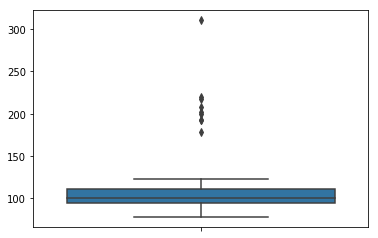

In [0]:
m_X2= m_X.copy()
for i in l_Idx:
    m_X2[i]= 2*m_X2[i]

In [0]:
# Import a biblioteca seaborn:
import seaborn as sns
sns.boxplot(y= m_X2)

Consegue identificar os outliers do array?

## Objetivo
> Desejamos substituir os valores negativos pela média dos dados. 

* Como fazer isso?

### Siga os passos a seguir
1. Calcule estatísticas descritivas antes das transformações par avaliar o impacto;
    * Calcule média, mediana e desvio-padrão dos dados originais;
2. Calcule os valores a seguir:
    * Q1, Q3
    * IQR = Q3-Q1
    * Lim_Inf = Q1-1.5\*IQR
    * Lim_Sup = Q3+1.5\*IQR
3. Proceda à substituição:
    * Se m_X2[i] < Lim_Inf então m_X2[i]= Lim_Inf
    * Se m_X2[i] > Lim_Sup então m_X2[i]= Lim_Sup
4. Calcule as estatísticas descritivas após as substituições e compare com os valores antes das transformações.

### Minha solução


1. Estatísticas Descritivas antes das transformações:

In [0]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(m_X2)}; Mediana: {np.median(m_X2)}; STD: {np.std(m_X2)}'

'Média: 110.56825524166379; Mediana: 99.98555955648851; STD: 35.484921348581274'

Observe o quanto nossos dados estão distorcidos dos valores originalmente utilizados.

2. Calcular Q1, Q3 e IQR

In [0]:
Q1= np.percentile(m_X2, q=[25])
Q3= np.percentile(m_X2, q=[75])
IQR= Q3-Q1
Lim_Inf= Q1-1.5*IQR
Lim_Sup= Q3+1.5*IQR

In [0]:
f'Q1: {Q1}; Q3: {Q3}; Lim_Inf: {Lim_Inf}; Lim_Sup: {Lim_Sup}'

'Q1: [94.39845112]; Q3: [111.13231538]; Lim_Inf: [69.29765473]; Lim_Sup: [136.23311177]'

3. Substituir
* Se m_X[i] < Lim_Inf então m_X[i]= Lim_Inf
* Se m_X[i] > Lim_Sup então m_X[i]= Lim_Sup

In [0]:
m_Y= m_X2.copy()

In [0]:
m_Y[m_Y < Lim_Inf[0]] = Lim_Inf[0]
m_Y[m_Y > Lim_Sup[0]] = Lim_Sup[0]
m_Y

array([ 92.26622483,  88.94525348, 136.23311177,  88.54282712,
        78.47337726,  92.47442751,  78.47005101,  96.69822268,
       136.23311177, 103.28896747, 100.10101983,  86.67863666,
        96.60541955,  99.87009928, 100.53428231,  98.13587989,
       103.94738054,  91.06457686,  94.93326767,  92.53390871,
       118.35863649,  87.94631286, 112.01848858, 105.1160897 ,
        94.30477141,  90.66561289,  97.50274717, 136.23311177,
       111.93333668, 122.99564969, 101.66570222, 107.13574148,
        95.47489218, 109.21639184, 107.3421263 , 121.78111913,
        99.43447875, 112.53259996,  96.29607519, 114.38552019,
       136.23311177,  98.87427612, 136.23311177, 109.41366709,
        99.13038373,  85.09992988, 136.23311177, 108.67052746,
       116.34090601, 113.63210628,  99.78246389,  95.46983552,
        96.28887641,  99.52839308,  77.2662565 , 109.53187379,
       107.10054804,  92.01167315,  96.83422097,  84.16471762,
       136.23311177,  97.02396587,  92.65757933,  94.42

4. Estatísticas Descritivas para avaliarmos o impacto:

In [0]:
# Algumas estatísticas descritivas:
f'Média: {np.mean(m_Y)}; Mediana: {np.median(m_Y)}; STD: {np.std(m_Y)}'

'Média: 103.62127720599865; Mediana: 99.98555955648851; STD: 14.048907873665298'

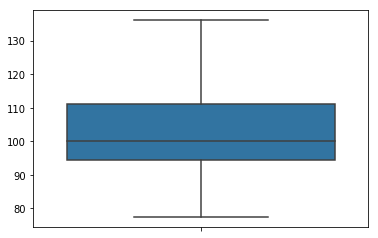

In [0]:
# Import a biblioteca seaborn:
import seaborn as sns
sns.boxplot(y= m_Y)

Como podem ver, os outliers desapareceram, como queríamos.

___
# **Valores únicos**
> Considere o array a seguir:

In [0]:
np.random.seed(20111974)
v_X= np.random.randint(0, 100, 100)
v_X

array([60, 42, 40,  8, 27,  2, 46, 88, 81, 88, 80, 13, 30, 82, 96, 63, 79,
       91, 72, 13, 89, 67, 93, 33, 99, 73, 77, 42, 55, 45, 41, 21, 22,  8,
       62, 10,  0, 94, 15,  9, 67, 89, 35, 42, 97, 93,  8, 83, 26,  5, 68,
       90, 74, 57, 40, 22, 45,  6, 81, 95,  0, 25, 50, 80, 76, 29,  7, 21,
        5, 95, 52, 93, 31, 78, 61, 50, 50,  7, 41,  3, 33, 47,  5, 16, 33,
       19, 92, 60, 56, 55, 53, 28, 84, 16, 27, 85, 22, 38, 49, 90])

Quem são os valores únicos do array?

In [0]:
np.unique(v_X)

array([ 0,  2,  3,  5,  6,  7,  8,  9, 10, 13, 15, 16, 19, 21, 22, 25, 26,
       27, 28, 29, 30, 31, 33, 35, 38, 40, 41, 42, 45, 46, 47, 49, 50, 52,
       53, 55, 56, 57, 60, 61, 62, 63, 67, 68, 72, 73, 74, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99])

___
# **Diferença entre dois arrays**
> O resultado é um array com os **valores únicos de A que não estão em B**. Na teoria de conjuntos escrevemos $A - B$.

![Difference](https://github.com/MathMachado/Python4DS/blob/DS_Python/Material/set_Difference.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)


* Vamos ver como isso funciona na prática:

## Exemplo 1

In [0]:
v_X= np.array([0, 1, 2, 4, 5, 7, 8,8]) # array de valores que serão excluidos em v_X. Observe que '3' não pertence a v_X.
v_Y= np.array([1, 6, 7, 3])

In [0]:
np.setdiff1d(v_X, v_Y)

array([0, 2, 4, 5, 8])

Observe que o resultado são os elementos de v_X que não pertencem a x_Y. Mas como fica o '3' nesta história?

## Exemplo 2

In [0]:
m_X= np.arange(10)
m_X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
m_Y= np.array([1,5,7])
m_Y

array([1, 5, 7])

In [0]:
np.setdiff1d(m_X, m_Y)

array([0, 2, 3, 4, 6, 8, 9])

Observe que os elementos de m_Y foram deletados de m_X. Ok?

___
# Conjuntos mutuamente exclusivos
* Em teoria de conjuntos, chamamos de Diferença Simétrica e escrevemos $(A \cup B)- (A \cap B)$.

![DifferenceSymetric](https://github.com/MathMachado/Python4DS/blob/DS_Python/Material/set_DifferenceSymetric.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

* Vamos ver como isso funciona na prática:

In [0]:
v_X= np.array([0, 1, 2, 4, 5, 7, 8]) # Observe que [1, 4, 7] pertencem a v_X, mas 3, não. Portanto:
v_Y= np.array([1, 4, 7, 3])

In [0]:
np.setxor1d(v_X, v_Y)

array([0, 2, 3, 5, 8])

Como explicamos ou interpretamos este resultado?

___
# **União de dois arrays**
> Retorna os valores únicos dos dois arrays. Na teoria dos conjuntos, escrevemos:

$$A \cup B$$

![Union](https://github.com/MathMachado/Python4DS/blob/DS_Python/Material/set_Union.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

In [0]:
v_X= np.array([0, 1, 2, 4, 5, 7, 8])

# Observe que [1, 4, 7] pertencem a v_X, mas 3, não. Portanto:
v_Y= np.array([1, 4, 7, 3])

In [0]:
np.union1d(v_X, v_Y)

array([0, 1, 2, 3, 4, 5, 7, 8])

___
# **Selecionar itens comuns dos arrays X e Y**
* Na teoria de conjuntos, chamamos de intersecção e escrevemos $X \cap Y$.

![Intersection](https://github.com/MathMachado/Python4DS/blob/DS_Python/Material/set_Intersection.PNG?raw=true)

Fonte: [Python Set](https://www.learnbyexample.org/python-set/)

* Considere os ndarrays a seguir:

In [0]:
m_X= np.arange(10)
m_X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
m_Y= np.arange(8, 18)
m_Y

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

Quais são os elementos comuns à X e Y?

In [0]:
np.intersect1d(m_X, m_Y)

array([8, 9])

___
# **Autovalores e Autovetores**
> Autovetor e Autovalor são um dos tópicos mais importantes em Machine Learning.

Por definição, o escalar $\lambda$ e o vetor $v$ são autovalor e autovetor da matriz $A$ se

$$Av = \lambda v$$

## Leitura Adicional:

* [Machine Learning & Linear Algebra — Eigenvalue and eigenvector](https://medium.com/@jonathan_hui/machine-learning-linear-algebra-eigenvalue-and-eigenvector-f8d0493564c9)

* O ndarray m_Array_3_X_3 tem a seguinte forma:

In [0]:
m_Array_3_X_3

NameError: ignored

In [0]:
# Calcula autovalores e autovetores:
v_Autovalores, v_Autovetores= np.linalg.eig(m_Array_3_X_3)

Os autovalores do ndarray m_Array_3_X_3 são:

In [0]:
v_Autovalores

Os autovetores do ndarray m_Array_3_X_3 são:

In [0]:
v_Autovetores

___
# **Encontrar Missing Values (NaN)**
> Considere o array a seguir:

In [0]:
# Define seed
np.random.seed(20111974)
v_X= np.random.random(100)
v_X

array([0.53, 0.57, 0.54, 0.65, 0.86, 0.6 , 0.87, 0.46, 0.67, 0.64, 0.55,
       0.35, 0.32, 0.89, 0.85, 0.76, 0.66, 0.33, 0.35, 0.42, 0.31, 0.27,
       0.31, 0.36, 0.6 , 0.02, 0.36, 0.19, 0.28, 0.37, 0.15, 0.44, 0.2 ,
       0.21, 0.65, 0.82, 0.72, 0.5 , 0.17, 0.6 , 0.25, 0.14, 0.03, 0.71,
       0.07, 0.56, 0.26, 0.84, 0.21, 0.85, 0.63, 0.38, 0.91, 0.34, 0.07,
       0.1 , 0.85, 0.12, 0.94, 0.16, 0.07, 0.91, 0.59, 0.37, 0.72, 0.07,
       0.48, 0.78, 0.97, 0.72, 0.29, 0.33, 0.95, 0.24, 0.98, 0.85, 0.63,
       0.57, 0.67, 0.88, 0.37, 0.85, 0.89, 0.68, 0.29, 0.33, 0.98, 0.17,
       0.6 , 0.92, 0.98, 0.76, 0.31, 0.97, 0.08, 0.56, 0.75, 0.49, 0.07,
       0.11])

In [0]:
# Inserindo 15 NaN's no array:
np.random.seed(20111974)
l_IndicesAleatorios= np.random.randint(0, 100, size= 15)
l_IndicesAleatorios

array([60, 42, 40,  8, 27,  2, 46, 88, 81, 88, 80, 13, 30, 82, 96])

In [0]:
for i_Idx in l_IndicesAleatorios:
    #print(i_Idx)
    v_X[i_Idx]= np.nan

In [0]:
v_X

array([0.53, 0.57,  nan, 0.65, 0.86, 0.6 , 0.87, 0.46,  nan, 0.64, 0.55,
       0.35, 0.32,  nan, 0.85, 0.76, 0.66, 0.33, 0.35, 0.42, 0.31, 0.27,
       0.31, 0.36, 0.6 , 0.02, 0.36,  nan, 0.28, 0.37,  nan, 0.44, 0.2 ,
       0.21, 0.65, 0.82, 0.72, 0.5 , 0.17, 0.6 ,  nan, 0.14,  nan, 0.71,
       0.07, 0.56,  nan, 0.84, 0.21, 0.85, 0.63, 0.38, 0.91, 0.34, 0.07,
       0.1 , 0.85, 0.12, 0.94, 0.16,  nan, 0.91, 0.59, 0.37, 0.72, 0.07,
       0.48, 0.78, 0.97, 0.72, 0.29, 0.33, 0.95, 0.24, 0.98, 0.85, 0.63,
       0.57, 0.67, 0.88,  nan,  nan,  nan, 0.68, 0.29, 0.33, 0.98, 0.17,
        nan, 0.92, 0.98, 0.76, 0.31, 0.97, 0.08, 0.56,  nan, 0.49, 0.07,
       0.11])

Ok, inserimos aleatoriamente 14 NaN's no array v_X. Agora, vamos contar quantos NaN's (já sabemos a resposta!).

In [0]:
np.isnan(v_X).sum()

14

Ok, agora eu quero saber os índices desses NaN's.

In [0]:
i_Idx= np.where(np.isnan(v_X))
i_Idx

(array([ 2,  8, 13, 27, 30, 40, 42, 46, 60, 80, 81, 82, 88, 96]),)

Vamos conferir se está correto? Para isso, basta comparar com l_IndicesAleatorios:

In [0]:
l_IndicesAleatorios= np.sort(l_IndicesAleatorios)

In [0]:
np.intersect1d(l_IndicesAleatorios, i_Idx).shape

(14,)

Ou seja, identificamos todos os NaN's.

# **Deletar NaN's de um array**
> Considere o mesmo array que acabamos de trabalhar. Agora eu quero excluir os NaN's identificados.

In [0]:
v_X

array([0.53, 0.57,  nan, 0.65, 0.86, 0.6 , 0.87, 0.46,  nan, 0.64, 0.55,
       0.35, 0.32,  nan, 0.85, 0.76, 0.66, 0.33, 0.35, 0.42, 0.31, 0.27,
       0.31, 0.36, 0.6 , 0.02, 0.36,  nan, 0.28, 0.37,  nan, 0.44, 0.2 ,
       0.21, 0.65, 0.82, 0.72, 0.5 , 0.17, 0.6 ,  nan, 0.14,  nan, 0.71,
       0.07, 0.56,  nan, 0.84, 0.21, 0.85, 0.63, 0.38, 0.91, 0.34, 0.07,
       0.1 , 0.85, 0.12, 0.94, 0.16,  nan, 0.91, 0.59, 0.37, 0.72, 0.07,
       0.48, 0.78, 0.97, 0.72, 0.29, 0.33, 0.95, 0.24, 0.98, 0.85, 0.63,
       0.57, 0.67, 0.88,  nan,  nan,  nan, 0.68, 0.29, 0.33, 0.98, 0.17,
        nan, 0.92, 0.98, 0.76, 0.31, 0.97, 0.08, 0.56,  nan, 0.49, 0.07,
       0.11])

In [0]:
v_X[~np.isnan(v_X)]

array([0.53, 0.57, 0.65, 0.86, 0.6 , 0.87, 0.46, 0.64, 0.55, 0.35, 0.32,
       0.85, 0.76, 0.66, 0.33, 0.35, 0.42, 0.31, 0.27, 0.31, 0.36, 0.6 ,
       0.02, 0.36, 0.28, 0.37, 0.44, 0.2 , 0.21, 0.65, 0.82, 0.72, 0.5 ,
       0.17, 0.6 , 0.14, 0.71, 0.07, 0.56, 0.84, 0.21, 0.85, 0.63, 0.38,
       0.91, 0.34, 0.07, 0.1 , 0.85, 0.12, 0.94, 0.16, 0.91, 0.59, 0.37,
       0.72, 0.07, 0.48, 0.78, 0.97, 0.72, 0.29, 0.33, 0.95, 0.24, 0.98,
       0.85, 0.63, 0.57, 0.67, 0.88, 0.68, 0.29, 0.33, 0.98, 0.17, 0.92,
       0.98, 0.76, 0.31, 0.97, 0.08, 0.56, 0.49, 0.07, 0.11])

Observe que os NaN's foram excluidos.

___
# **Converter lista em array**
> Considere a lista a seguir:

In [0]:
l_Lista= [np.random.randint(0, 10, 10)]
l_Lista

[array([8, 9, 3, 7, 1, 3, 2, 9, 7, 7])]

In [0]:
type(l_Lista)

list

Convertendo a minha lista para array:

In [0]:
v_Lista= np.asarray(l_Lista)
v_Lista

array([[8, 9, 3, 7, 1, 3, 2, 9, 7, 7]])

In [0]:
type(v_Lista)

numpy.ndarray

___
# Converter tupla em array
> Considere a tupla a seguir:

In [0]:
np.random.seed(20111974)
t_Lista= ([np.random.randint(0, 10, 3)], [np.random.randint(0, 10, 3)], [np.random.randint(0, 10, 3)])
t_Lista

([array([8, 8, 2])], [array([8, 9, 1])], [array([8, 0, 4])])

In [0]:
type(t_Lista)

tuple

In [0]:
v_Lista= np.asarray(t_Lista)
v_Lista

array([[[8, 8, 2]],

       [[8, 9, 1]],

       [[8, 0, 4]]])

In [0]:
type(v_Lista)

numpy.ndarray

___
# Acrescentar elementos à um array
> Considere o array a seguir:

In [0]:
v_X= np.arange(5)
v_X

array([0, 1, 2, 3, 4])

In [0]:
np.random.seed(20111974)
v_X = np.append(v_X, [np.random.randint(0, 10, 3), np.random.randint(0, 10, 3), np.random.randint(0, 10, 3)])
v_X

array([0, 1, 2, 3, 4, 8, 8, 2, 8, 9, 1, 8, 0, 4])

___
# **Converter array 1D num array 2D**
> Considere os arrays a seguir:

In [0]:
np.random.seed(20111974)
v_X= np.array(np.random.randint(0, 10, 6))

np.random.seed(19741120)
v_Y= np.array(np.random.randint(0, 10, 6))

In [0]:
v_X

array([8, 8, 2, 8, 9, 1])

In [0]:
v_Y

array([7, 8, 4, 0, 9, 7])

In [0]:
np.column_stack((v_X, v_Y)) # Atenção aos parênteses em (v_X, v_Y).

array([[8, 7],
       [8, 8],
       [2, 4],
       [8, 0],
       [9, 9],
       [1, 7]])

___
# **Excluir um elemento específico do array usando indices**
> Considere os arrays a seguir:

In [0]:
np.random.seed(20111974)
v_X= np.array(np.random.randint(0, 10, 6))
v_X

array([8, 8, 2, 8, 9, 1])

Suponha que eu queira excluir os valores '8' de v_X. Os índices dos valores '8' são: [0, 1, 3]. Portanto, temos:

In [0]:
v_X= np.delete(v_X, [0, 1, 3])
v_X

array([2, 9, 1])

___
# **Frequência dos valores únicos de um array**
> Considere o array a seguir:

In [0]:
np.random.seed(20111974)
v_X= np.array(np.random.randint(0, 10, 100))
v_X

array([8, 8, 2, 8, 9, 1, 8, 0, 4, 2, 0, 8, 9, 3, 7, 1, 3, 2, 9, 7, 7, 9,
       5, 6, 8, 7, 0, 9, 3, 9, 3, 1, 8, 6, 3, 5, 4, 1, 2, 9, 8, 6, 6, 1,
       0, 9, 2, 0, 7, 5, 5, 4, 4, 2, 7, 2, 7, 9, 3, 1, 5, 0, 1, 2, 3, 8,
       7, 5, 4, 0, 5, 9, 6, 6, 1, 3, 6, 0, 4, 9, 2, 1, 0, 9, 1, 4, 2, 9,
       7, 9, 5, 3, 7, 6, 3, 9, 8, 4, 3, 0])

Suponha que eu queira saber quantas vezes o número/elemento '2' aparece em v_X.

In [0]:
l_Itens_Unicos, i_Count = np.unique(v_X, return_counts=True)
l_Itens_Unicos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

O que significa o output acima?

In [0]:
i_Count

array([10, 10, 10, 11,  8,  8,  8, 10, 10, 15])

Qual a interpretação do output acima?

In [0]:
np.asarray((l_Itens_Unicos, i_Count))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 10, 10, 11,  8,  8,  8, 10, 10, 15]])

Qual a interpretação do output acima?

___
# **Combinações possíveis de outros arrays**
> Considere o exemplo a seguir:


In [0]:
v_X = [2, 4, 6]
v_Y = [0, 8]
v_Z = [1, 5]

In [0]:
np.meshgrid(v_X, v_Y, v_Z)

[array([[[2, 2],
         [4, 4],
         [6, 6]],
 
        [[2, 2],
         [4, 4],
         [6, 6]]]), array([[[0, 0],
         [0, 0],
         [0, 0]],
 
        [[8, 8],
         [8, 8],
         [8, 8]]]), array([[[1, 5],
         [1, 5],
         [1, 5]],
 
        [[1, 5],
         [1, 5],
         [1, 5]]])]

In [0]:
np.array(np.meshgrid(v_X, v_Y, v_Z))

array([[[[2, 2],
         [4, 4],
         [6, 6]],

        [[2, 2],
         [4, 4],
         [6, 6]]],


       [[[0, 0],
         [0, 0],
         [0, 0]],

        [[8, 8],
         [8, 8],
         [8, 8]]],


       [[[1, 5],
         [1, 5],
         [1, 5]],

        [[1, 5],
         [1, 5],
         [1, 5]]]])

In [0]:
np.array(np.meshgrid(v_X, v_Y, v_Z)).T

array([[[[2, 0, 1],
         [2, 8, 1]],

        [[4, 0, 1],
         [4, 8, 1]],

        [[6, 0, 1],
         [6, 8, 1]]],


       [[[2, 0, 5],
         [2, 8, 5]],

        [[4, 0, 5],
         [4, 8, 5]],

        [[6, 0, 5],
         [6, 8, 5]]]])

In [0]:
# Resultado final
v_W= np.array(np.meshgrid(v_X, v_Y, v_Z)).T.reshape(-1,3)
v_W

array([[2, 0, 1],
       [2, 8, 1],
       [4, 0, 1],
       [4, 8, 1],
       [6, 0, 1],
       [6, 8, 1],
       [2, 0, 5],
       [2, 8, 5],
       [4, 0, 5],
       [4, 8, 5],
       [6, 0, 5],
       [6, 8, 5]])

___
# **Wrap Up**

___
# **Exercícios**

## Exercício 1 - Selecionar os números pares
> Dado o 1D array abaixo, selecionar somente os números pares.

In [0]:
v_Array= np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
v_Array

### **Minha solução**

In [0]:
v_Array[v_Array % 2 == 0]

___
## Exercício 2 - Substituir pela mediana
> Dado o array 1D abaixo, substituir os números pares pela mediana de v_Array.

In [0]:
v_Array= np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
v_Array

### **Minha solução**
* Primeiramente, precisamos calcular a mediana.
* Depois, substituimos os valores pares de v_Array pela mediana encontrada anteriormente. Ok?

In [0]:
v_Array[v_Array % 2 == 0] = np.median(v_Array)
v_Array

Verificando...

In [0]:
f'A média de v_Array é: {np.median(v_Array)}'

___
## Exercício 3 - Reshape
> Dado o array 1D abaixo, reshape para um array 2D com 3 colunas.

In [0]:
# Define seed
np.random.seed(20111974)
v_Array= np.array(np.random.randint(1, 10, size= 15))
v_Array

### **Minha solução**
* O array 1D v_Array acima possui 15 elementos. Como queremos transformá-lo num array 2D com 3 colunas, então cada coluna terá 5 elementos.

In [0]:
v_Array.reshape(5, 3) 
# Poderia ser v_Array.reshape(-1, 3), onde "-1" pede para o NumPy calcular o número de linhas. 

___
## Exercício 4 - Reshape
> Dado o array 1D abaixo, reshape para um array 3D com 2 colunas.

In [0]:
# Define seed
np.random.seed(20111974)
v_Array= np.array(np.random.randint(1, 10, size= 16))
v_Array

### **Minha solução**
* O array 1D v_Array acima possui 16 elementos. Queremos transformá-lo num array 3D com 2 colunas.

In [0]:
v_Array.reshape(-1, 2) # O valor "-1" na posição das linhas pede ao NumPy para calcular o número de linhas automaticamente.